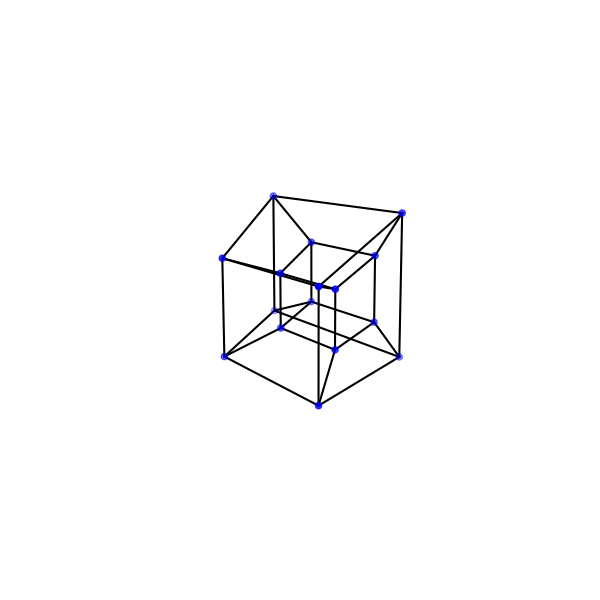

In [13]:
'''import math
import numpy as np
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


#creating vertices for  teserract
vertices= list(itertools.product([0,1],repeat=4))
print('Vertices=',vertices)

#creating edges for teserract using hamming distance(if we take 2  different set from vertices then it will add the different digits and in our case hamming=1)
edges=[]
for i in range(len(vertices)):
  for j in range(i+1,len(vertices)):
    # Count the number of differing coordinates
    diff = sum(a != b for a, b in zip(vertices[i], vertices[j]))
    if diff==1:
      edges.append((i,j))


#Now we need rotation for simulating 4D

def rotate_4D(point,plane,theta):
  x,y,z,w = point
  cos_t=math.cos(theta)
  sin_t=math.sin(theta)

  if plane == 'xw':
    x,w= x*cos_t-w*sin_t,x*sin_t+w*cos_t
  elif plane == 'yw':
    y,w= y*cos_t-w*sin_t,y*sin_t+w*cos_t
  elif plane == 'zw':
    z,w= z*cos_t-w*sin_t,z*sin_t+w*cos_t
  elif plane == 'xz':
    x,z= x*cos_t-z*sin_t,x*sin_t+z*cos_t
  elif plane == 'yz':
    y,z= y*cos_t-z*sin_t,y*sin_t+z*cos_t
  elif plane == 'xy':
    x,y= x*cos_t-y*sin_t,x*sin_t+y*cos_t
  return x,y,z,w


#Now we are applying rotation in multiple planes

def apply_all_rotations(point,theta):
  for plane in ['xw','yw','zw','xz','yz','xy']:
    point = rotate_4D(point,plane,theta)
  return point
theta= 0.1
rotated_points = [apply_all_rotations(point,theta) for point in vertices]
print(rotated_points)


#Now we project 4D in 3D
def project_4D_to_3D(point, d=2.5):
  x,y,z,w = point
  factor = d/(d-w)
  return(x*factor,y*factor,z*factor)

for i, point in enumerate(rotated_points):
  print(f'Rotated 4D Point {i}: {point}')
  print(f'Projected 3D Point {i}: {project_4D_to_3D(point)}')

#Now we add figure

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Tesseract Projection (4D to 3D)')
ax.set_box_aspect([1,1,1])

scat = ax.scatter([],[],[],color='blue')
lines = [ax.plot([],[],[],color='black')[0]for _ in edges]

angle=0

def update(frame):
  global angle
  angle+=0.05
  rotated_points = [apply_all_rotations(point,angle) for point in vertices]
  projected_points = [project_4D_to_3D(point) for point in rotated_points]
  xs, ys, zs = zip(*projected_points)
  scat._offsets3d = (xs, ys, zs)
  for idx, (i, j) in enumerate(edges):
    x_vals = [projected_points[i][0], projected_points[j][0]]
    y_vals = [projected_points[i][1], projected_points[j][1]]
    z_vals = [projected_points[i][2], projected_points[j][2]]
    lines[idx].set_data(x_vals, y_vals)
    lines[idx].set_3d_properties(z_vals)
    return lines + [scat]

# Create animation
ani = FuncAnimation(fig, update, frames=100, interval=50, blit=False)
plt.title("Rotating 4D Tesseract (Projected to 3D)")
plt.show()'''

import math
import itertools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation, PillowWriter
from IPython.display import Image

# 4D rotation
def rotate_4d(point, plane, theta):
    x, y, z, w = point
    cos_t = math.cos(theta)
    sin_t = math.sin(theta)
    if plane == 'xw':
        x, w = x * cos_t - w * sin_t, x * sin_t + w * cos_t
    elif plane == 'yw':
        y, w = y * cos_t - w * sin_t, y * sin_t + w * cos_t
    return (x, y, z, w)

# 4D → 3D projection
def project_4d_to_3d(point, d=3.0):
    x, y, z, w = point
    factor = d / (d - w)
    return (x * factor, y * factor, z * factor)

# Vertices of the tesseract
vertices = list(itertools.product([-1, 1], repeat=4))

# Edges based on Hamming distance = 1
edges = []
for i in range(len(vertices)):
    for j in range(i + 1, len(vertices)):
        if sum(a != b for a, b in zip(vertices[i], vertices[j])) == 1:
            edges.append((i, j))

# Create figure and 3D axis
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_box_aspect([1, 1, 1])
ax.axis('off')  # Hide axes for clean view

# Prepare plot objects
scat = ax.scatter([], [], [], color='blue', s=20)
lines = [ax.plot([], [], [], color='black')[0] for _ in edges]

# Animation update function
angle = 0
def update(frame):
    global angle
    angle += 0.05
    rotated = [rotate_4d(v, 'xw', angle) for v in vertices]
    rotated = [rotate_4d(v, 'yw', angle) for v in rotated]
    projected = [project_4d_to_3d(v) for v in rotated]

    # Update scatter
    xs, ys, zs = zip(*projected)
    scat._offsets3d = (xs, ys, zs)

    # Update edges
    for idx, (i, j) in enumerate(edges):
        x_vals = [projected[i][0], projected[j][0]]
        y_vals = [projected[i][1], projected[j][1]]
        z_vals = [projected[i][2], projected[j][2]]
        lines[idx].set_data(x_vals, y_vals)
        lines[idx].set_3d_properties(z_vals)
    return lines + [scat]

# Create animation
ani = FuncAnimation(fig, update, frames=500, interval=500, blit=True)
#plt.show()

# Save to GIF
ani.save("tesseract.gif", writer=PillowWriter(fps=20))
plt.close()

# Display in Colab
Image(filename="tesseract.gif")